<a href="https://colab.research.google.com/github/Nibras2108002/Fraud-Detection_Credit_Card/blob/main/Nibras_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [6]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving creditcard.csv.zip to creditcard.csv.zip


In [7]:
import zipfile
import os

# Path to the uploaded .zip file
zip_path = "/content/creditcard.csv.zip"

# Extract the .zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Check the extracted files
print("Extracted Files:", os.listdir("/content/"))


Extracted Files: ['.config', 'creditcard.csv', 'creditcard.csv.zip', 'sample_data']


In [8]:
import pandas as pd

# Path to the extracted CSV file
data_path = "/content/creditcard.csv"

# Load the dataset
data = pd.read_csv(data_path)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [9]:
# Check data types and missing values
print("\nDataset Information:")
print(data.info())

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

<ipython-input-21-8783644ac988>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=data, palette=['blue', 'red'])


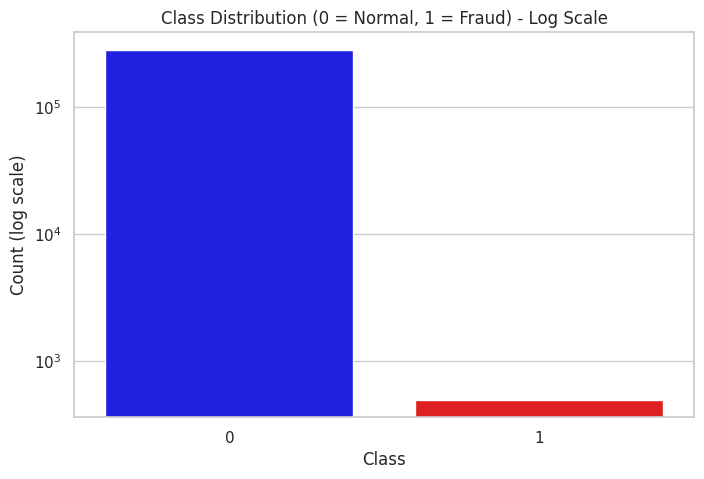

In [21]:

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Class', data=data, palette=['blue', 'red'])

# Set y-axis to log scale
ax.set_yscale('log')

plt.title('Class Distribution (0 = Normal, 1 = Fraud) - Log Scale')
plt.xlabel('Class')
plt.ylabel('Count (log scale)')
plt.show()


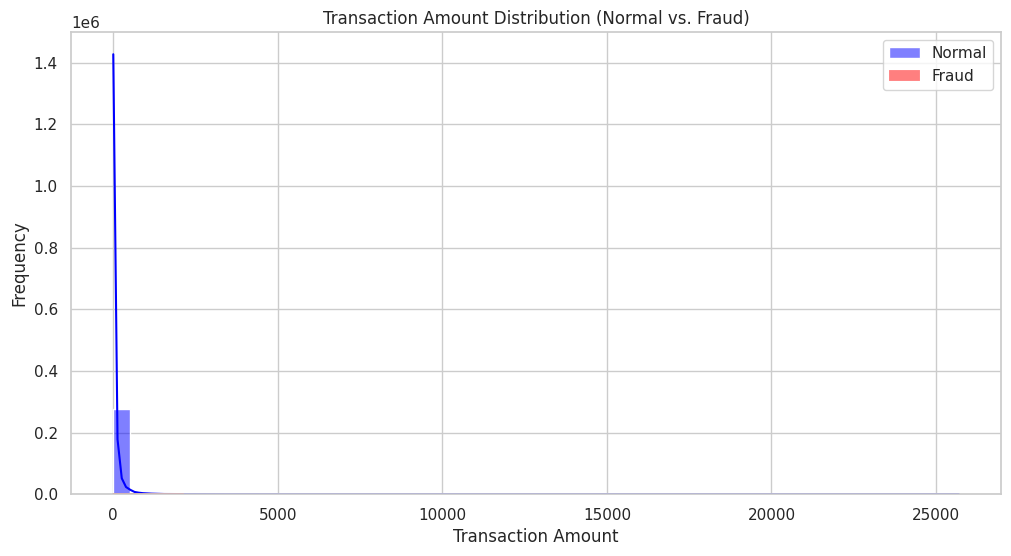

In [23]:
# Histogram of transaction amounts for normal and fraud transactions
plt.figure(figsize=(12, 6))

# Normal Transactions
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Normal', kde=True)

# Fraud Transactions
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)

plt.title('Transaction Amount Distribution (Normal vs. Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


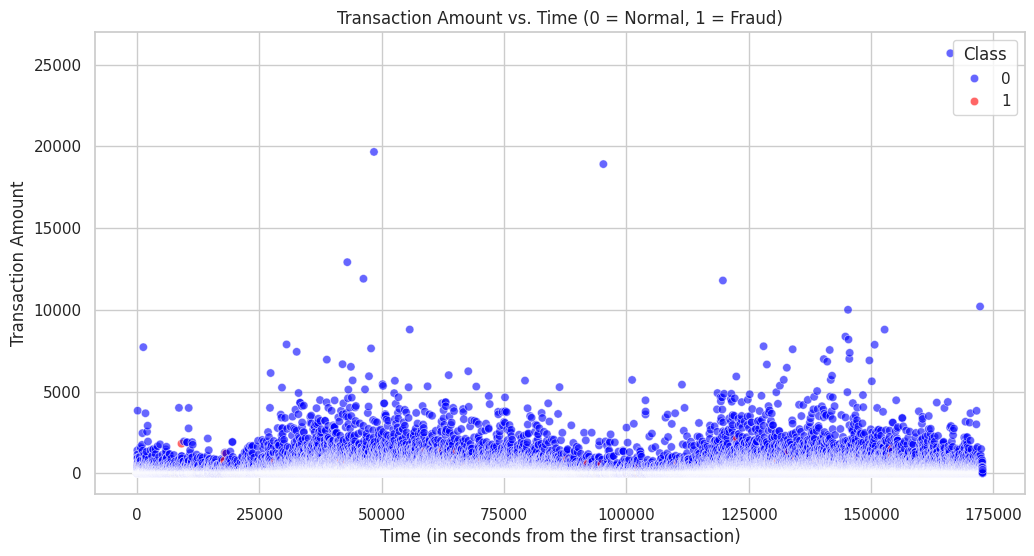

In [17]:
# Scatter plot to visualize transaction amount over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, palette=['blue', 'red'], alpha=0.6)
plt.title('Transaction Amount vs. Time (0 = Normal, 1 = Fraud)')
plt.xlabel('Time (in seconds from the first transaction)')
plt.ylabel('Transaction Amount')
plt.legend(title='Class', loc='upper right')
plt.show()


<ipython-input-18-ac3bc2438de1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette=['blue', 'red'])


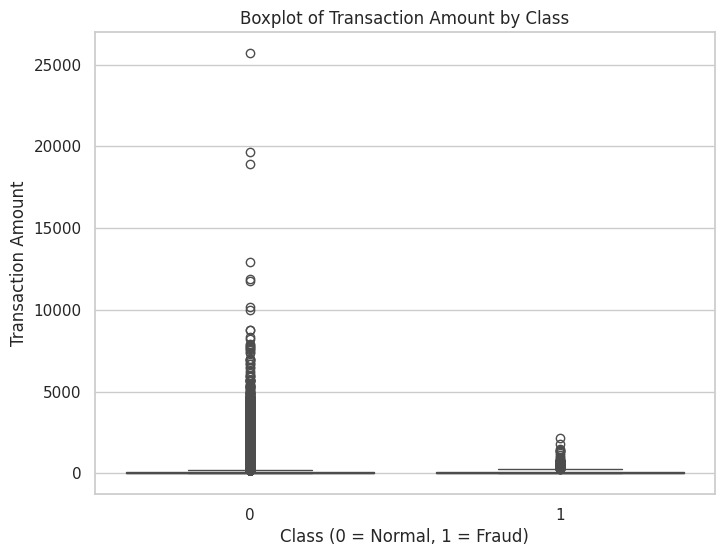

In [18]:
# Boxplot to observe outliers in transaction amounts for fraud vs. normal transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette=['blue', 'red'])
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class (0 = Normal, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


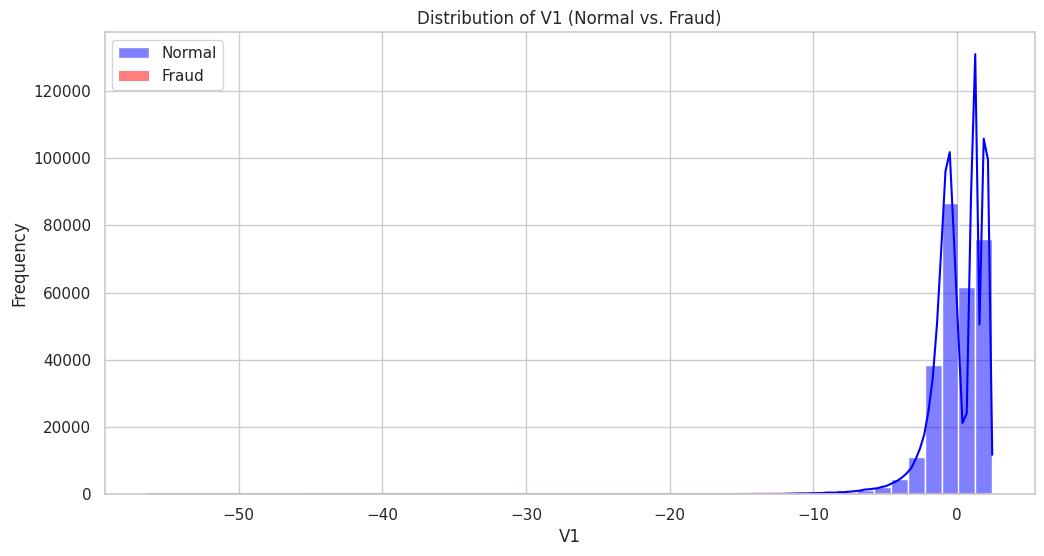

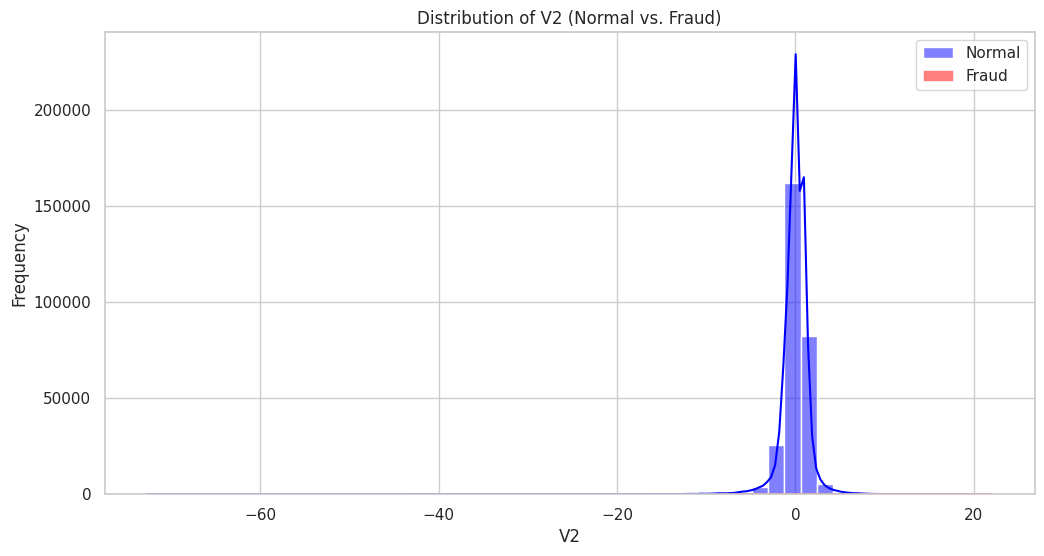

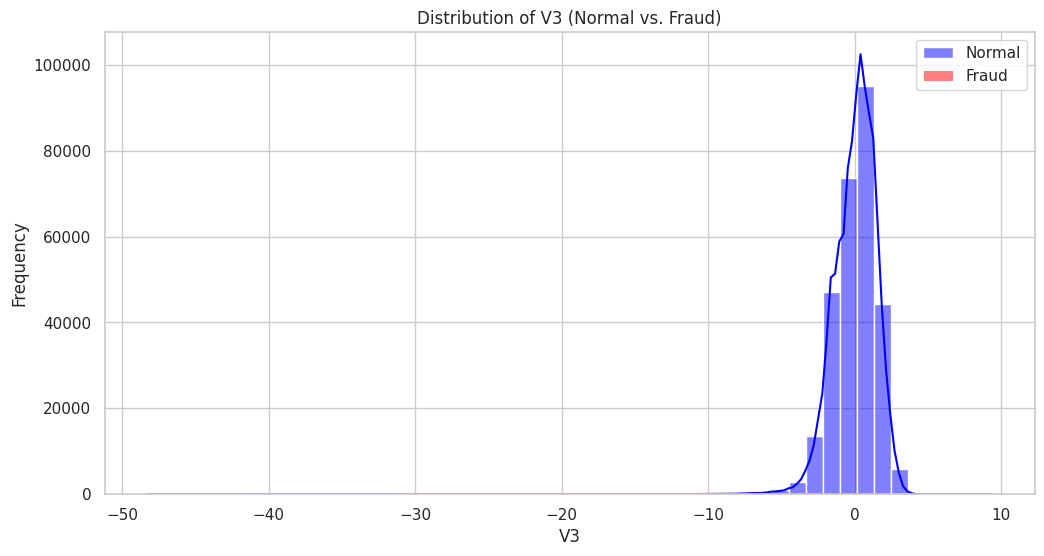

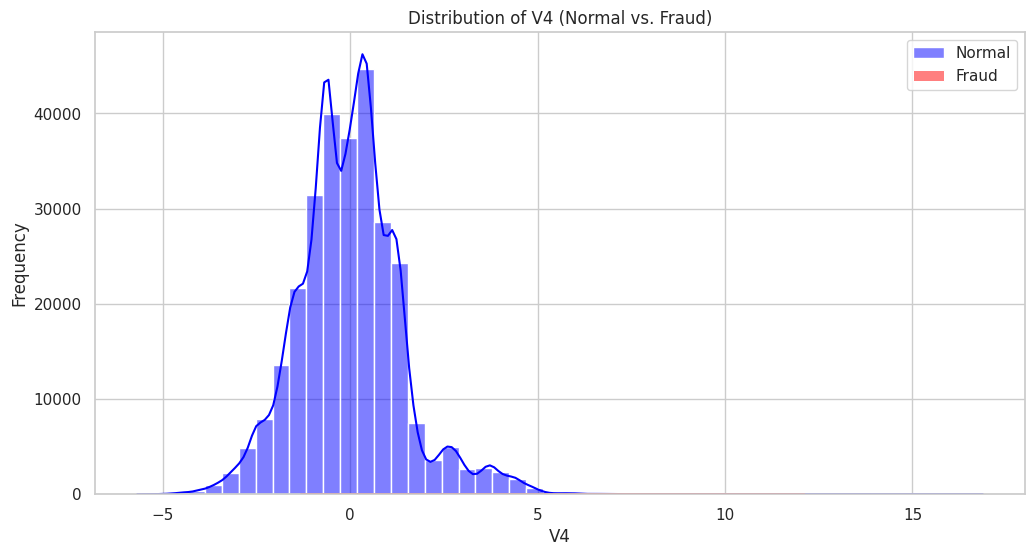

In [19]:
# List of selected features to analyze
features = ['V1', 'V2', 'V3', 'V4']

# Plot distributions
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[data['Class'] == 0][feature], bins=50, color='blue', label='Normal', kde=True)
    sns.histplot(data[data['Class'] == 1][feature], bins=50, color='red', label='Fraud', kde=True)
    plt.title(f'Distribution of {feature} (Normal vs. Fraud)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


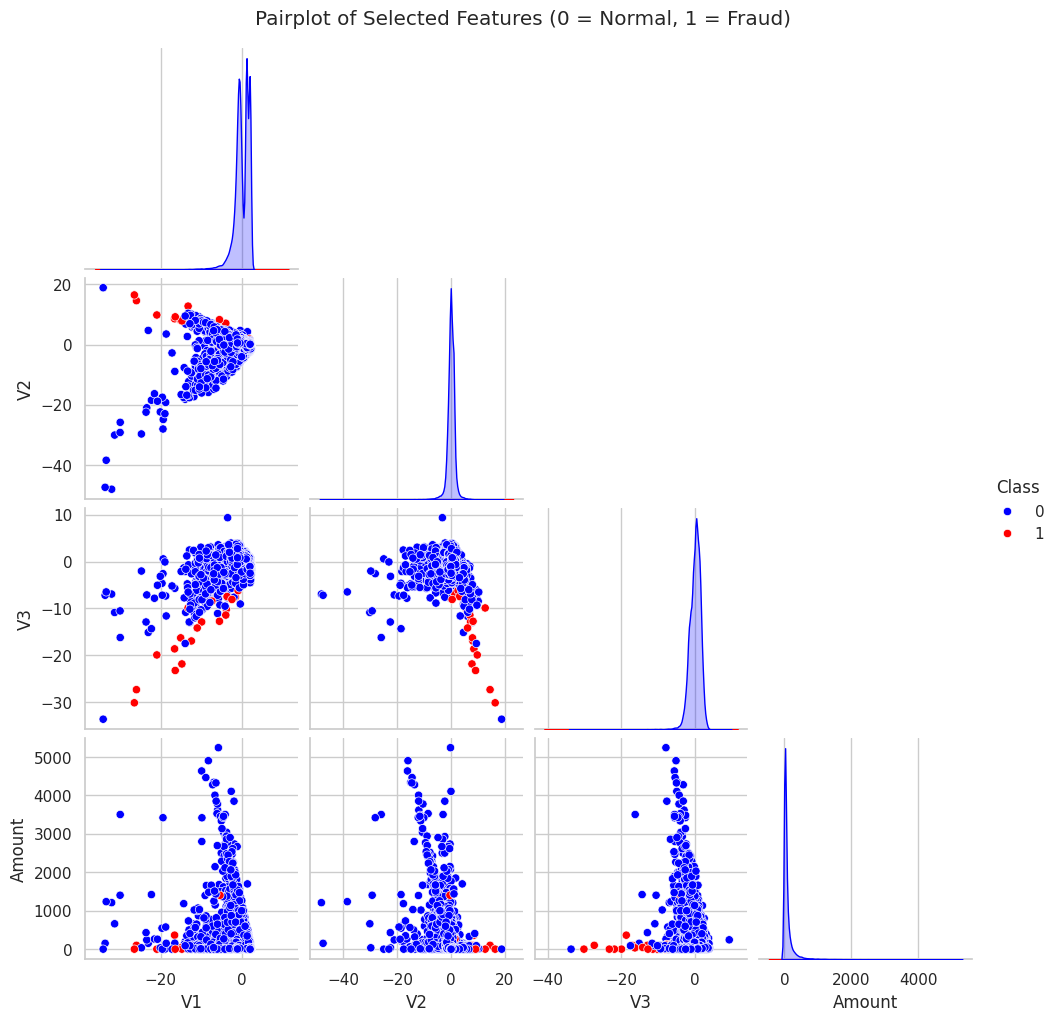

In [20]:
# Subsample the data to avoid excessive computation
subsample = data.sample(frac=0.1, random_state=42)

# Select features for pairplot
selected_features = ['V1', 'V2', 'V3', 'Amount', 'Class']

# Plot pairplot
sns.pairplot(subsample[selected_features], hue='Class', palette=['blue', 'red'], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Features (0 = Normal, 1 = Fraud)', y=1.02)
plt.show()


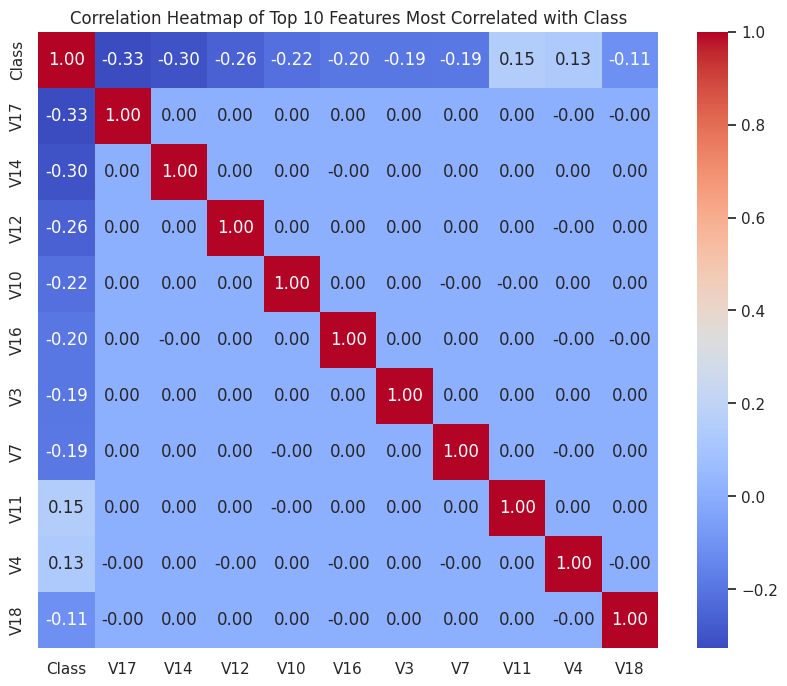

In [24]:
# Calculate correlation of all features with the target 'Class'
corr_with_class = data.corr()['Class'].abs().sort_values(ascending=False)

# Select top 10 features most correlated with 'Class' (including 'Class' itself)
top_features = corr_with_class.index[0:11]  # 10 features + Class

# Extract subset of the dataframe for these features
top_corr_data = data[top_features]

# Compute correlation matrix for these top features
corr_matrix_top = top_corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Top 10 Features Most Correlated with Class')
plt.show()



In [25]:
observations = """
Observations on Fraud Trends:

1. Highly Imbalanced Dataset:
   - Fraudulent transactions (Class = 1) form a very small portion (~0.17%) compared to normal transactions (Class = 0).
   - This imbalance makes fraud detection challenging.

2. Transaction Amounts:
   - Fraud transactions tend to have higher amounts on average but can also be low.
   - Distribution of fraud amounts is more spread and skewed compared to normal transactions.

3. Time Patterns:
   - Fraud may cluster at certain times but generally occur throughout.
   - No exclusive time window for fraud transactions.

4. Feature Correlations:
   - Some features (e.g., V1, V2, ...) show stronger correlation with fraud.
   - These features are important for fraud detection models.

5. Outliers and Anomalies:
   - Fraud transactions often appear as outliers in boxplots.
   - Outlier detection methods can help flag suspicious cases.

6. Class Separation Challenges:
   - Overlap between fraud and normal distributions means classification is complex.
   - Multiple features and advanced models improve detection.

"""

print(observations)




Observations on Fraud Trends:

1. Highly Imbalanced Dataset:
   - Fraudulent transactions (Class = 1) form a very small portion (~0.17%) compared to normal transactions (Class = 0).
   - This imbalance makes fraud detection challenging.

2. Transaction Amounts:
   - Fraud transactions tend to have higher amounts on average but can also be low.
   - Distribution of fraud amounts is more spread and skewed compared to normal transactions.

3. Time Patterns:
   - Fraud may cluster at certain times but generally occur throughout.
   - No exclusive time window for fraud transactions.

4. Feature Correlations:
   - Some features (e.g., V1, V2, ...) show stronger correlation with fraud.
   - These features are important for fraud detection models.

5. Outliers and Anomalies:
   - Fraud transactions often appear as outliers in boxplots.
   - Outlier detection methods can help flag suspicious cases.

6. Class Separation Challenges:
   - Overlap between fraud and normal distributions means class